**SPAM DETECTION USING NAIVE BAYES**

In [ ]:
import pandas as pd
import numpy as n
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


In [ ]:
# Try reading the file with 'latin-1' encoding
data = pd.read_csv("spam.csv", encoding='latin-1')

In [ ]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# **DATA VISUALISATION**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

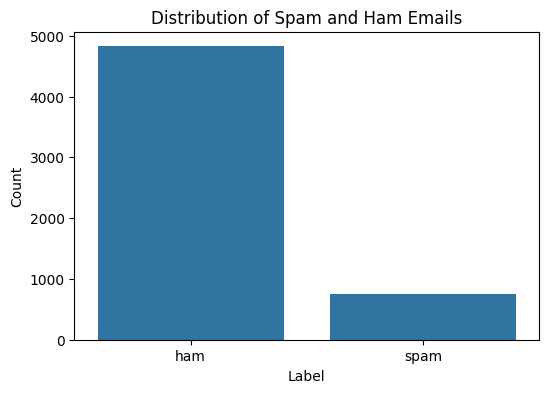

In [ ]:
# Visualize the distribution of labels
plt.figure(figsize=(6, 4))
sns.countplot(x=data['v1'])
plt.title('Distribution of Spam and Ham Emails')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# **NAIVE BAYES**

In [ ]:
# Drop unnecessary columns
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [ ]:
data['spam']=data['v1'].apply(lambda x:1 if x=='spam' else 0)
data

,v1,v2,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [ ]:
X = data['v2']
y = data['spam']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40)
x_train

15      XXXMobileMovieClub: To use your credit, click ...
1301                 I tot u reach liao. He said t-shirt.
3059             K..k...from tomorrow onwards started ah?
3123    My uncles in Atlanta. Wish you guys a great se...
1884        I love your ass! Do you enjoy doggy style? :)
                              ...                        
4722                     HELLO PEACH! MY CAKE TASTS LUSH!
3340                  Still i have not checked it da. . .
5426        Oh yeah! And my diet just flew out the window
3064                          Sounds good, keep me posted
3398    Yeah we wouldn't leave for an hour at least, h...
Name: v2, Length: 4457, dtype: object

In [ ]:
cv = CountVectorizer()
x_train_count = cv.fit_transform(x_train)
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
model = MultinomialNB().fit(x_train_count,y_train)
model

MultinomialNB()

In [ ]:
email_ham=["hey Wanna meet up for the game?"]
email_spam=["reward money click"]
email=[]
email.append(email_ham)
email.append(email_spam)
for i in email:
  email_ham_count=cv.transform(i)
  prediction = model.predict(email_ham_count)
  if prediction==1:
    print(f"{i} is a Spam")
  else:
    print(f"{i} is Not a Spam")


['hey Wanna meet up for the game?'] is Not a Spam
['reward money click'] is a Spam


In [ ]:
x_test_count = cv.transform(x_test)
model.score(x_test_count,y_test)

0.9829596412556054